<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/0102522025_UAS_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**2. Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DM/data_balita.csv')

#**3. Exploratory Data Analysis (EDA)**

In [ ]:
df.head(5)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [ ]:
print(df.isnull().sum())

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


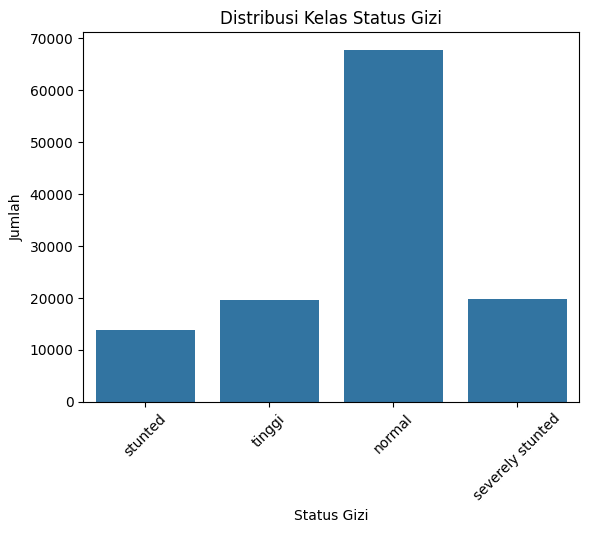

In [ ]:
# Visualisasi distribusi kelas target
sns.countplot(data=df, x='Status Gizi')
plt.title('Distribusi Kelas Status Gizi')
plt.xlabel('Status Gizi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

#**4. Pre Processing**

In [ ]:
data = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data['Status Gizi'] = label_encoder.fit_transform(data['Status Gizi'])

In [ ]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [ ]:
x = data.drop('Status Gizi', axis=1)
y = data['Status Gizi']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#**5. Model KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.996900826446281


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13551
severely stunted       1.00      1.00      1.00      3974
         stunted       0.99      0.99      0.99      2763
          tinggi       1.00      1.00      1.00      3912

        accuracy                           1.00     24200
       macro avg       1.00      1.00      1.00     24200
    weighted avg       1.00      1.00      1.00     24200



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[13529     0     8    14]
 [    0  3958    16     0]
 [   16    13  2734     0]
 [    8     0     0  3904]]


#**6. Visualisasi Hasil Klasifikasi KNN**

/tmp/ipython-input-81-668285265.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status Gizi', y='Tinggi Badan (cm)', palette='viridis')


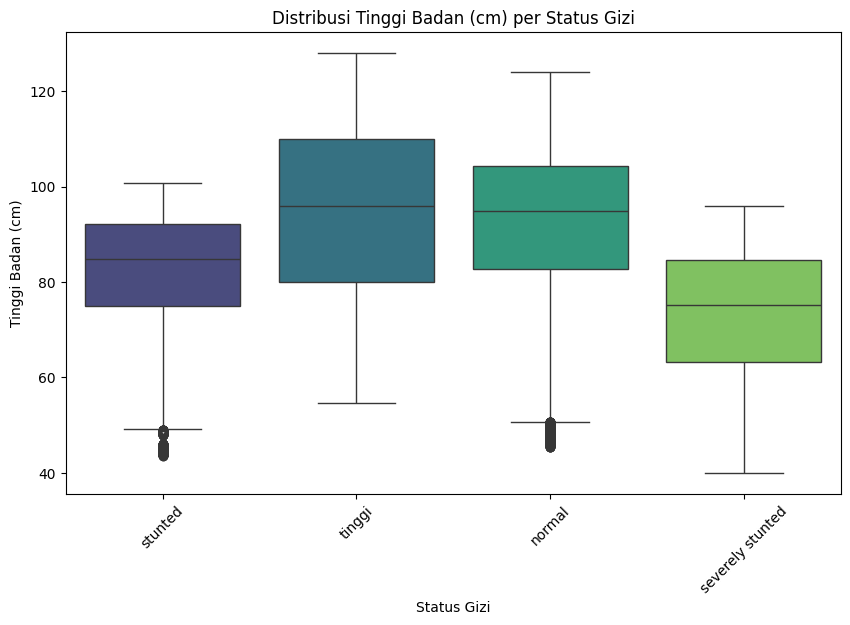

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Status Gizi', y='Tinggi Badan (cm)', palette='viridis')
plt.title('Distribusi Tinggi Badan (cm) per Status Gizi')
plt.xlabel('Status Gizi')
plt.ylabel('Tinggi Badan (cm)')
plt.xticks(rotation=45)
plt.show()

###**6.1 Visualisasi Confusion Matrix**

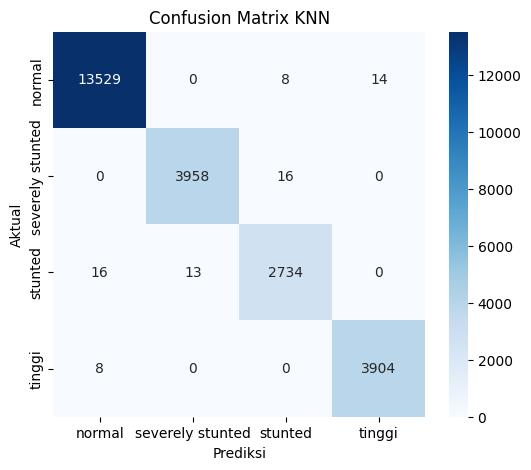

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix KNN")
plt.show()

###**6.2 Distribusi Prediksi vs Aktual**

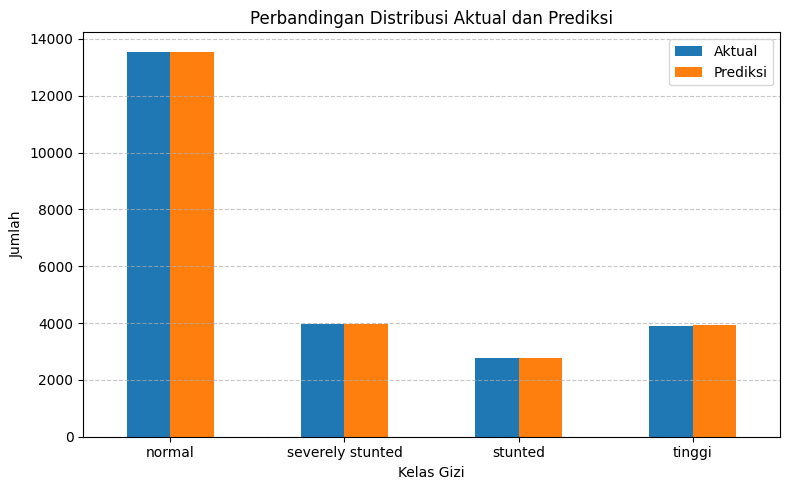

In [ ]:
# Reverse mapping angka ke label string
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Hitung distribusi
import pandas as pd

pred_counts = pd.Series(y_pred).map(reverse_label_mapping).value_counts().sort_index()
true_counts = y_test.map(reverse_label_mapping).value_counts().sort_index()

# Gabungkan menjadi DataFrame
df_counts = pd.DataFrame({'Aktual': true_counts, 'Prediksi': pred_counts})

# Plot bar chart
df_counts.plot(kind='bar', figsize=(8,5))
plt.title("Perbandingan Distribusi Aktual dan Prediksi")
plt.xlabel("Kelas Gizi")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**7. Analisis Hasil & Insight**

###**7.1 Prediksi pada Beberapa Sampel**

In [ ]:
# Buat reverse mapping untuk label numerik ke string
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Tampilkan beberapa prediksi dan label aktual
sample_index = [5, 10, 50, 100]
for i in sample_index:
    pred_label = reverse_label_mapping[y_pred[i]]
    true_label = reverse_label_mapping[y_test.values[i]]
    print(f"Index {i}: Prediksi = {pred_label}, Aktual = {true_label}")


Index 5: Prediksi = severely stunted, Aktual = severely stunted
Index 10: Prediksi = normal, Aktual = normal
Index 50: Prediksi = normal, Aktual = normal
Index 100: Prediksi = stunted, Aktual = stunted


###**7.2 Distribusi Prediksi vs Label Aktual**

In [ ]:
# Hitung jumlah prediksi per kelas
pred_counts = pd.Series(y_pred).map(reverse_label_mapping).value_counts()
true_counts = y_test.map(reverse_label_mapping).value_counts()

print("\nDistribusi Prediksi Kelas:")
print(pred_counts)

print("\nDistribusi Aktual Kelas:")
print(true_counts)


Distribusi Prediksi Kelas:
normal              13553
severely stunted     3971
tinggi               3918
stunted              2758
Name: count, dtype: int64

Distribusi Aktual Kelas:
Status Gizi
normal              13551
severely stunted     3974
tinggi               3912
stunted              2763
Name: count, dtype: int64


#**8. Simpan Hasil Prediksi ke CSV**

In [ ]:
import pandas as pd

# Buat DataFrame hasil prediksi
hasil_prediksi = pd.DataFrame({
    'Umur (bulan)': X_test[:, 0],
    'Jenis Kelamin': X_test[:, 1],
    'Tinggi Badan (cm)': X_test[:, 2],
    'Label Aktual': y_test.map(reverse_label_mapping).values,
    'Label Prediksi': pd.Series(y_pred).map(reverse_label_mapping).values
})

# Simpan ke file CSV
hasil_prediksi.to_csv('hasil_prediksi_knn_gizi.csv', index=False)